<a href="https://colab.research.google.com/github/NAVEED261/MY-AI-ASSISTANT/blob/main/ACTUAL_Adding_Memory_to_the_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture --no-stderr
%pip install langchain_google_genai langchain_core langchain_community langgraph tavily-python

In [ ]:
import os
from google.colab import userdata
Gemnai_api_key = userdata.get('GOOGLE_API_KEY')
tavily_api_key = userdata.get("Tavily_Api_Key")
os.environ["Tavily_Api_Key"] = "Tavily_Api_Key"

from langchain_google_genai import ChatGoogleGenerativeAI
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI (
    model = "gemini-pro",  # Changed the model name to a valid model identifier
    api_key = Gemnai_api_key
)
llm.invoke("i am hafiz naveed uddin from karachi")

AIMessage(content='Welcome to the platform, Hafiz Naveed Uddin from Karachi! I am here to assist you with any writing-related tasks you may have.\n\nIf you have any specific writing needs, please feel free to let me know. I can help you with various writing tasks, including:\n\n* **Content creation:** I can generate high-quality content for your website, blog, or social media channels.\n* **Article writing:** I can write engaging and informative articles on a wide range of topics.\n* **Blog post writing:** I can help you create compelling blog posts that will attract and engage your target audience.\n* **Scriptwriting:** I can write scripts for videos, podcasts, and other multimedia content.\n* **Proofreading and editing:** I can proofread and edit your written content to ensure it is error-free and polished.\n\nI am confident that I can provide you with the writing support you need to achieve your goals. Please feel free to reach out to me with any questions or requests.', additional_

In [ ]:
LANGCHAIN_API_KEY = userdata.get('memory-enabled-agent')  # LangSmith API key

# Configure environment variables for LangChain and LangSmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"  # Enable LangSmith tracing
os.environ["LANGCHAIN_PROJECT"] = "memory-enabled-agent"  # Set LangSmith project name
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY  # Set LangSmith API key

In [ ]:

from langchain_community.tools.tavily_search import TavilySearchResults
# Initialize the tool (You can pass the key directly if needed)
tool = TavilySearchResults(max_results=2)
# Alternatively: tool = TavilySearchResults(tavily_api_key=tavily_api_key, max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'url': 'https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141',
  'content': 'Nodes: Nodes are the building blocks of your LangGraph. Each node represents a function or a computation step. You define nodes to perform specific tasks, such as processing input, making'},
 {'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
  'content': "In LangGraph, each node represents an LLM agent, and the edges are the communication channels between these agents. This structure allows for clear and manageable workflows, where each agent performs specific tasks and passes information to other agents as needed. State management. One of LangGraph's standout features is its automatic state"}]

In [ ]:
def calculate_compensation(delay_hours: float, ticket_cost: float, inconvenience_level: str) -> str:
    """
    Calculates the compensation amount for travel delays.

    Args:
        delay_hours (float): The number of hours the travel was delayed.
        ticket_cost (float): The cost of the ticket in USD.
        inconvenience_level (str): The level of inconvenience caused ('low', 'medium', 'high').

    Returns:
        str: A string with the calculated compensation amount.
    """
    base_compensation = 0.0

    # Calculate base compensation based on delay hours
    if delay_hours > 0 and delay_hours <= 2:
        base_compensation = ticket_cost * 0.25
    elif delay_hours > 2 and delay_hours <= 5:
        base_compensation = ticket_cost * 0.5
    elif delay_hours > 5:
        base_compensation = ticket_cost * 0.75

    # Adjust compensation based on inconvenience level
    if inconvenience_level.lower() == "high":
        base_compensation += 100  # Additional for high inconvenience
    elif inconvenience_level.lower() == "medium":
        base_compensation += 50  # Additional for medium inconvenience

    # Ensure compensation is fair and within ticket cost
    if base_compensation > ticket_cost:
        base_compensation = ticket_cost

    return f"The calculated compensation is ${base_compensation:.2f}."

def check_refund_eligibility(ticket_cost: float, cancellation_reason: str) -> str:
    """
    Determines if a customer is eligible for a refund based on the cancellation reason.

    Args:
        ticket_cost (float): The cost of the ticket in USD.
        cancellation_reason (str): The reason for the cancellation (e.g., 'medical emergency', 'flight cancellation').

    Returns:
        str: A string indicating whether the customer is eligible for a refund.
    """
    eligible_reasons = ["medical emergency", "flight cancellation", "overbooking"]
    if cancellation_reason.lower() in eligible_reasons:
        return f"The customer is eligible for a full refund of ${ticket_cost:.2f}."
    else:
        return "The customer is not eligible for a refund based on the given reason."

def legal_case_evaluation(case_details: str) -> str:
    """
    Evaluates the legal strength of a travel-related case based on provided details.

    Args:
        case_details (str): A description of the case including relevant facts and issues.

    Returns:
        str: A string with a legal recommendation or analysis of the case's strength.
    """
    if "delay" in case_details.lower() and "no compensation" in case_details.lower():
        return "The case has a strong basis for legal escalation due to lack of compensation for delays."
    elif "lost baggage" in case_details.lower():
        return "The case has moderate legal strength for compensation claims due to lost baggage."
    elif "overbooking" in case_details.lower():
        return "The case is strong and should be pursued for compensation due to overbooking."
    else:
        return "The case details are unclear. Recommend gathering more evidence."

def calculate_airline_penalty(delay_hours: float, passenger_count: int) -> str:
    """
    Calculates the penalty that should be imposed on an airline for delays.

    Args:
        delay_hours (float): The total hours of delay caused by the airline.
        passenger_count (int): The total number of passengers affected.

    Returns:
        str: A string with the calculated penalty amount.
    """
    penalty_per_hour = 50  # Base penalty per passenger per hour of delay
    total_penalty = delay_hours * passenger_count * penalty_per_hour

    return f"The airline should be fined a total of ${total_penalty:.2f} for the delay."
tools = [calculate_compensation, check_refund_eligibility, legal_case_evaluation, calculate_airline_penalty]
llm_with_tools = llm.bind_tools(tools)

In [ ]:
llm_with_tools

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7fc3b0e4ea10>, default_metadata=()), kwargs={'tools': [{'function_declarations': [{'name': 'calculate_compensation', 'description': "Calculates the compensation amount for travel delays.\n\nArgs:\n    delay_hours (float): The number of hours the travel was delayed.\n    ticket_cost (float): The cost of the ticket in USD.\n    inconvenience_level (str): The level of inconvenience caused ('low', 'medium', 'high').\n\nReturns:\n    str: A string with the calculated compensation amount.", 'parameters': {'type_': 6, 'description': "Calculates the compensation amount for travel delays.\n\nArgs:\n    delay_hours (float): The number of hours the travel was delayed.\n    ticket_cost (float): The cost of the ticket in USD.\n    inconvenience_level (str): The level of incon

In [ ]:
from langgraph.graph import StateGraph,START,END
from langgraph.graph.state import CompiledStateGraph
from langgraph.prebuilt import ToolNode,tools_condition
from langgraph.graph import MessagesState
from langchain_core.messages import AIMessage , HumanMessage, SystemMessage
from IPython.display import Image
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()


In [ ]:
def assistant (state:MessagesState)->MessagesState:
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

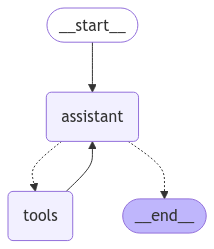

In [ ]:
builder:StateGraph = StateGraph(MessagesState)
builder.add_node("assistant",assistant)
builder.add_node("tools", ToolNode(tools))
builder.add_edge(START, "assistant")
builder.add_conditional_edges("assistant", tools_condition)
builder.add_edge("tools","assistant")
graph:CompiledStateGraph = builder.compile(checkpointer=memory)
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
# Configuration for the test
config1 = {"configurable": {"thread_id": "1"}}






In [ ]:
def stream_graph_updates(user_input: str):
    # Configuration for the stream - provide necessary keys for checkpointer
    config = {"configurable": {"thread_id": "1"}}
    for event in graph.stream({"messages": [("user", user_input)]}, config=config):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: do u know langgraph?
Assistant: 
Assistant: The case details are unclear. Recommend gathering more evidence.
Assistant: I do not have enough information to provide a legal evaluation of LangGraph.
User: im hafiz naveed uddin
Assistant: 
Assistant: The case details are unclear. Recommend gathering more evidence.
Assistant: I do not have enough information to provide a legal evaluation of Hafiz Naveed Uddin.
User: what is my name?
Assistant: I do not have enough information to answer that question. Can you tell me your name?
User: what is justice?
Assistant: 
Assistant: The case details are unclear. Recommend gathering more evidence.
Assistant: I do not have enough information to provide a legal evaluation of justice.
User: tell me all history of chati
Assistant: I do not have a history of chats.
User: tell me all conversations
Assistant: I do not have any conversations to share.
